In [52]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [53]:
data = pd.read_csv(r'/content/_testdata.csv')
data

,timestamp,kilnMainDriveCurrent,kilnRot,kilnFeed,idFanRot,kilnInletPressure,calcinerHeadPressure,kilnInletTemp,calcinerHeadTemp,sinteringZoneTemp,...,rdfMainBurner,rdfCalciner,ureaConsumption,petcokeCalciner,coAfterCalciner,o2BeforeFilter,gasMainBurner,o2AfterCalciner,kilnInletO2,noxKilnInlet
0,03-01-2019 00:00,308.380000,1.190000,109.990000,758.526667,-0.963333,-7.416667,1048.056667,887.600000,727.603333,...,0.000000,5.996667,504.413333,2852.770000,0.010000,7.763333,4977.710,5.067210,20.890000,116.168092
1,03-01-2019 00:00,308.265000,1.190000,109.620000,758.570000,-1.080000,-8.105000,1055.845000,888.800000,731.650000,...,0.000000,6.000000,385.000000,2652.015000,0.010000,8.110000,4979.815,5.067210,20.890000,116.168092
2,03-01-2019 00:01,314.383333,1.190000,109.946667,758.613333,-1.156667,-7.903333,1063.633333,889.950000,717.963333,...,0.000000,6.000000,417.083333,2586.796667,0.010000,7.826667,4981.920,5.067210,20.890000,116.168092
3,03-01-2019 00:01,308.975000,1.190000,110.320000,758.660000,-1.175000,-7.475000,1071.420000,889.765000,707.410000,...,0.000000,6.000000,421.795000,2639.460000,0.010000,7.790000,4984.020,5.067210,20.890000,116.168092
4,03-01-2019 00:02,302.646667,1.186667,109.976667,758.700000,-0.823333,-7.563333,1071.603333,888.583333,702.713333,...,0.000000,5.996667,430.730000,2665.090000,0.010000,8.333333,4990.440,5.067210,20.896667,116.168092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33116,03-12-2019 11:58,344.916667,2.700000,155.433333,759.676667,-4.440000,-9.066667,1196.340000,886.236667,1347.740000,...,4013.950000,14.946667,360.376667,323.476667,0.006667,7.303333,0.000,3.366667,21.090000,763.888947
33117,03-12-2019 11:58,344.950000,2.700000,155.140000,752.540000,-4.375000,-9.600000,1204.645000,886.605000,1353.315000,...,4014.035000,14.570000,366.385000,292.920000,0.000000,7.135000,0.000,3.330024,21.085000,763.594283
33118,03-12-2019 11:59,345.983333,2.700000,155.030000,750.923333,-4.476667,-9.660000,1205.100000,886.980000,1357.856667,...,3988.610000,14.213333,368.463333,322.640000,0.000000,7.303333,0.000,3.287098,21.080000,763.343932
33119,03-12-2019 11:59,345.255000,2.700000,155.335000,745.450000,-4.380000,-9.750000,1204.575000,887.355000,1349.200000,...,4002.070000,13.905000,351.890000,291.165000,0.000000,7.475000,0.000,3.258428,21.080000,763.138474


In [54]:
output_variables = ['kilnInletO2']

df = data[['timestamp'] + output_variables]
print(df.head())

          timestamp  kilnInletO2
0  03-01-2019 00:00    20.890000
1  03-01-2019 00:00    20.890000
2  03-01-2019 00:01    20.890000
3  03-01-2019 00:01    20.890000
4  03-01-2019 00:02    20.896667


In [55]:
df = df.iloc[::360,:]
df

,timestamp,kilnInletO2
0,03-01-2019 00:00,20.890000
360,03-01-2019 03:00,14.840000
720,03-01-2019 06:00,20.890000
1080,03-01-2019 09:00,20.463333
1440,03-01-2019 12:00,20.960000
...,...,...
31680,03-12-2019 00:00,20.850000
32040,03-12-2019 03:00,20.870000
32400,03-12-2019 06:00,20.830000
32760,03-12-2019 09:00,11.613333


In [56]:
from scalecast.Forecaster import Forecaster
f = Forecaster(y=df['kilnInletO2'],
                   current_dates=df['timestamp'])
f

Forecaster(
    DateStartActuals=2019-03-01T03:00:00.000000000
    DateEndActuals=2019-03-12T12:00:00.000000000
    Freq=3H
    N_actuals=92
    ForecastLength=0
    Xvars=[]
    Differenced=0
    TestLength=1
    ValidationLength=1
    ValidationMetric=rmse
    ForecastsEvaluated=[]
    CILevel=0.95
    BootstrapSamples=100
    CurrentEstimator=None
    GridsFile=Grids
)

In [57]:
f.set_test_length(12)       # 1. 12 observations to test the results
f.generate_future_dates(12) # 2. 12 future points to forecast
f.set_estimator('lstm')     # 3. LSTM neural network

Epoch 1/15
1/1 [==============================] - 13s 13s/step - loss: 0.8500 - val_loss: 0.7746
Epoch 2/15
1/1 [==============================] - 0s 131ms/step - loss: 0.8144 - val_loss: 0.7343
Epoch 3/15
1/1 [==============================] - 0s 154ms/step - loss: 0.7755 - val_loss: 0.6786
Epoch 4/15
1/1 [==============================] - 0s 141ms/step - loss: 0.7184 - val_loss: 0.5937
Epoch 5/15
1/1 [==============================] - 0s 128ms/step - loss: 0.6300 - val_loss: 0.4919
Epoch 6/15
1/1 [==============================] - 0s 143ms/step - loss: 0.5108 - val_loss: 0.4367
Epoch 7/15
1/1 [==============================] - 0s 136ms/step - loss: 0.4417 - val_loss: 0.4469
Epoch 8/15
1/1 [==============================] - 0s 154ms/step - loss: 0.4272 - val_loss: 0.4244
Epoch 9/15
1/1 [==============================] - 0s 144ms/step - loss: 0.4019 - val_loss: 0.3844
Epoch 10/15
1/1 [==============================] - 0s 153ms/step - loss: 0.3592 - val_loss: 0.3473
Epoch 11/15
1/1 [===

1/1 [==============================] - 2s 2s/step
Epoch 1/15
2/2 [==============================] - 10s 2s/step - loss: 0.8293 - val_loss: 0.7622
Epoch 2/15
2/2 [==============================] - 0s 100ms/step - loss: 0.7691 - val_loss: 0.6638
Epoch 3/15
2/2 [==============================] - 0s 102ms/step - loss: 0.6658 - val_loss: 0.4446
Epoch 4/15
2/2 [==============================] - 0s 106ms/step - loss: 0.4410 - val_loss: 0.3875
Epoch 5/15
2/2 [==============================] - 0s 111ms/step - loss: 0.3780 - val_loss: 0.3566
Epoch 6/15
2/2 [==============================] - 0s 100ms/step - loss: 0.3385 - val_loss: 0.2595
Epoch 7/15
2/2 [==============================] - 0s 106ms/step - loss: 0.2521 - val_loss: 0.2058
Epoch 8/15
2/2 [==============================] - 0s 109ms/step - loss: 0.2120 - val_loss: 0.2229
Epoch 9/15
2/2 [==============================] - 0s 109ms/step - loss: 0.2326 - val_loss: 0.2139
Epoch 10/15
2/2 [==============================] - 0s 112ms/step - los

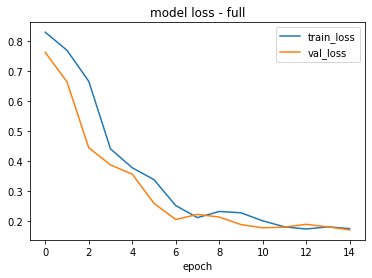

2/2 [==============================] - 0s 22ms/step


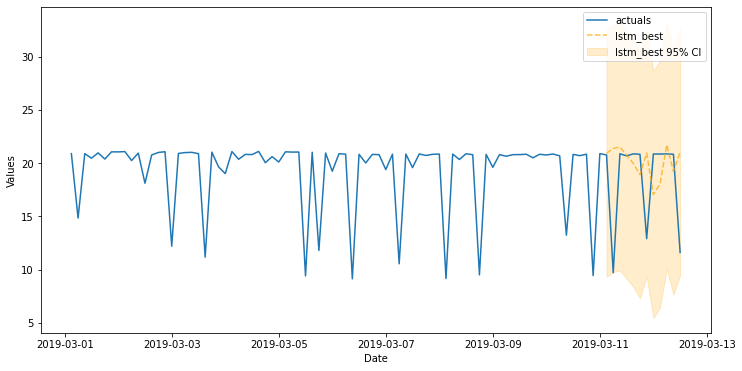

In [59]:
f.manual_forecast(call_me='lstm_best',
                  lags=36,
                  batch_size=32,
                  epochs=15,
                  validation_split=.2,
                  shuffle=True,
                  activation='tanh',
                  optimizer='Adam',
                  learning_rate=0.001,
                  lstm_layer_sizes=(72,)*4,
                  dropout=(0,)*4,
                  plot_loss=True)
f.plot_test_set(order_by='LevelTestSetMAPE',models='top_2',ci=True)